In [36]:
from sklearn import datasets

iris = datasets.load_iris()

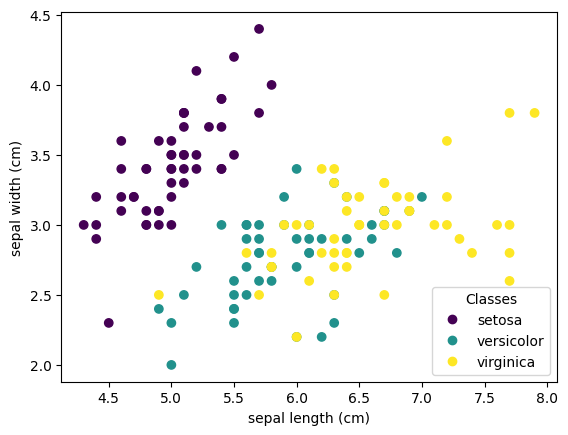

In [37]:
import matplotlib.pyplot as plt

_, ax = plt.subplots()
scatter = ax.scatter(iris.data[:, 0], iris.data[:, 1], c=iris.target)
ax.set(xlabel=iris.feature_names[0], ylabel=iris.feature_names[1])
_ = ax.legend(
    scatter.legend_elements()[0], iris.target_names, loc="lower right", title="Classes"
)

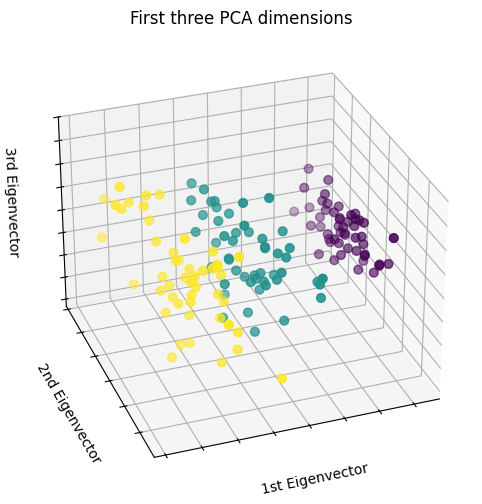

In [38]:
# unused but required import for doing 3d projections with matplotlib < 3.2
import mpl_toolkits.mplot3d  # noqa: F401

from sklearn.decomposition import PCA

fig = plt.figure(1, figsize=(8, 6))
ax = fig.add_subplot(111, projection="3d", elev=-150, azim=110)

X_reduced = PCA(n_components=3).fit_transform(iris.data)
ax.scatter(
    X_reduced[:, 0],
    X_reduced[:, 1],
    X_reduced[:, 2],
    c=iris.target,
    s=40,
)

ax.set_title("First three PCA dimensions")
ax.set_xlabel("1st Eigenvector")
ax.xaxis.set_ticklabels([])
ax.set_ylabel("2nd Eigenvector")
ax.yaxis.set_ticklabels([])
ax.set_zlabel("3rd Eigenvector")
ax.zaxis.set_ticklabels([])

plt.show()

Accuracy: 1.00

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45


Decision tree visualization saved as 'iris_decision_tree.png'


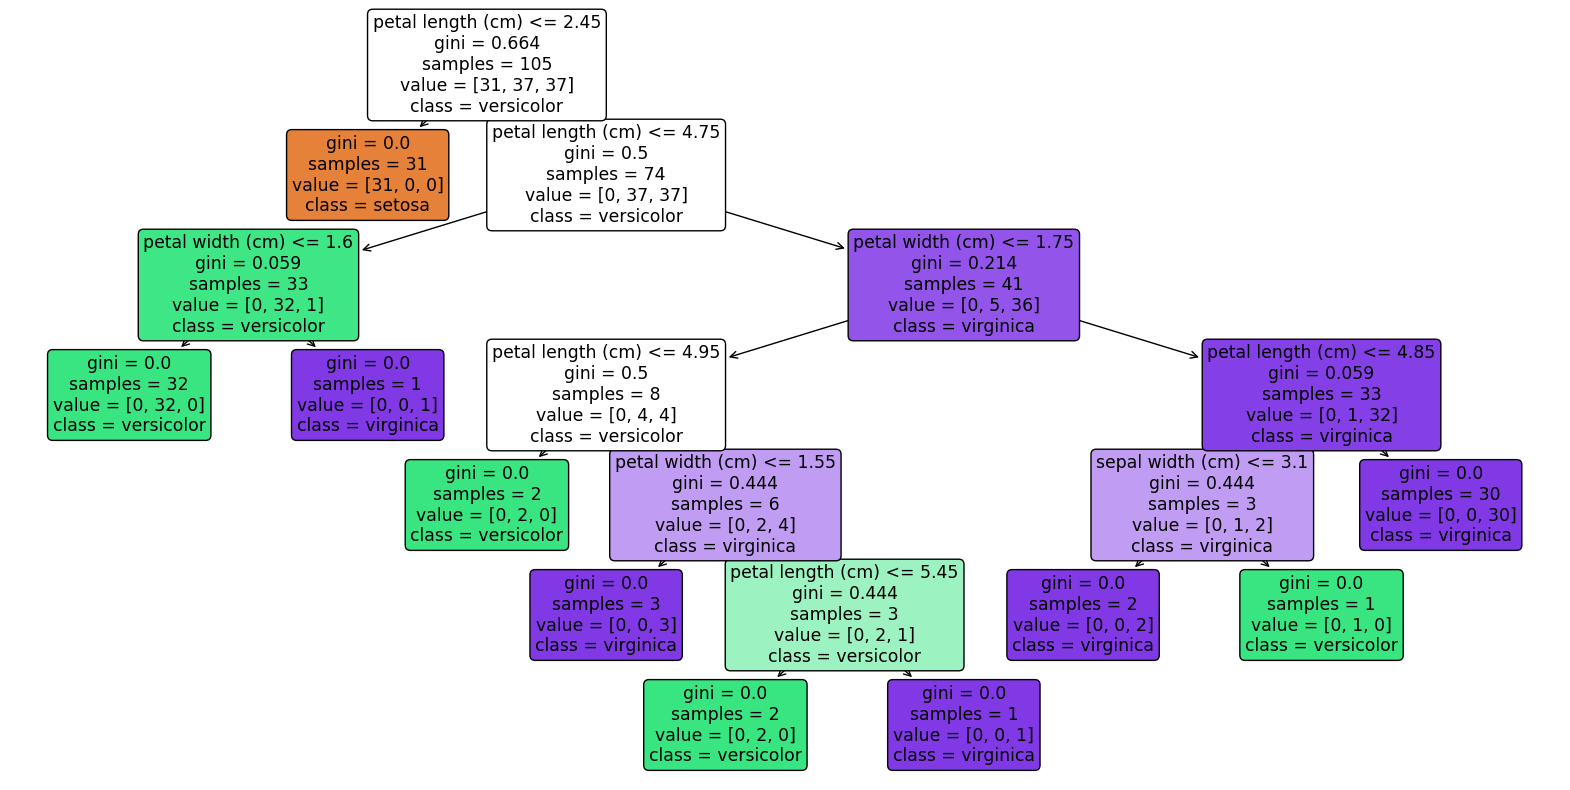

In [39]:
# Import necessary libraries
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Load the iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create and train the decision tree classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Print the classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=iris.target_names))

# Visualize the decision tree
plt.figure(figsize=(20,10))
plot_tree(clf, feature_names=iris.feature_names, class_names=iris.target_names, filled=True, rounded=True)
plt.savefig('iris_decision_tree.png')
print("\nDecision tree visualization saved as 'iris_decision_tree.png'")

In [40]:
sample_1 = X[1]

In [41]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
def Tabular_Mask(X, n_samples=50):
    min_vals = X.min(axis=0)
    max_vals = X.max(axis=0)
    masks = np.random.uniform(min_vals, max_vals, size=(n_samples, X.shape[1]))
    return masks

masks = Tabular_Mask(iris.data, n_samples=50)

In [42]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

# Load the iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Normalize the iris data
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)

def Tabular_Mask(X, n_samples=50):
    """
    Create mask samples with random values between min and max of each feature in X.
    
    Parameters:
    X (array-like): The normalized dataset
    n_samples (int): Number of mask samples to generate
    
    Returns:
    array-like: Mask samples
    """
    min_vals = X.min(axis=0)
    max_vals = X.max(axis=0)
    
    masks = np.random.uniform(min_vals, max_vals, size=(n_samples, X.shape[1]))
    return masks

# Create 50 masks based on the normalized data
masks = Tabular_Mask(X_normalized, n_samples=50)

# Print the first few rows of the original data, normalized data, and masks
print("First few rows of original iris data:")
print(X[:5])
print("\nFirst few rows of normalized iris data:")
print(X_normalized[:5])
print("\nFirst few rows of masks:")
print(masks[:5])

# Verify that all values in normalized data and masks are between 0 and 1

First few rows of original iris data:
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]

First few rows of normalized iris data:
[[0.22222222 0.625      0.06779661 0.04166667]
 [0.16666667 0.41666667 0.06779661 0.04166667]
 [0.11111111 0.5        0.05084746 0.04166667]
 [0.08333333 0.45833333 0.08474576 0.04166667]
 [0.19444444 0.66666667 0.06779661 0.04166667]]

First few rows of masks:
[[0.53123424 0.2403247  0.04387605 0.97732398]
 [0.63696402 0.55673793 0.85021967 0.92319018]
 [0.27832743 0.29321738 0.4770843  0.83401497]
 [0.90713257 0.06957206 0.18277614 0.2168297 ]
 [0.79203439 0.77836969 0.09596151 0.13778553]]


In [43]:
# Take one sample from X_normalized (let's use the first sample)
sample = X[0]

# Create the Mutant table
Mutant = masks * sample

# Use clf to predict the class for each mutant
mutant_predictions = clf.predict(Mutant)

# Print the original sample and its predicted class
print("Original sample:")
print(sample)
print("Predicted class for original sample:", clf.predict([sample])[0])

print("\nFirst few mutants and their predictions:")
for i in range(5):  # Print first 5 mutants
    print(f"Mutant {i}:")
    print(Mutant[i])
    print(f"Predicted class: {mutant_predictions[i]}")
    print()

# Count the occurrences of each predicted class
unique, counts = np.unique(mutant_predictions, return_counts=True)
print("\nPrediction distribution for mutants:")
for class_label, count in zip(unique, counts):
    print(f"Class {class_label}: {count} mutants")

Original sample:
[5.1 3.5 1.4 0.2]
Predicted class for original sample: 0

First few mutants and their predictions:
Mutant 0:
[2.70929461 0.84113645 0.06142648 0.1954648 ]
Predicted class: 0

Mutant 1:
[3.24851651 1.94858277 1.19030754 0.18463804]
Predicted class: 0

Mutant 2:
[1.41946989 1.02626082 0.66791802 0.16680299]
Predicted class: 0

Mutant 3:
[4.62637613 0.24350223 0.2558866  0.04336594]
Predicted class: 0

Mutant 4:
[4.0393754  2.72429392 0.13434611 0.02755711]
Predicted class: 0


Prediction distribution for mutants:
Class 0: 50 mutants


In [44]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

# Load the iris dataset
iris = load_iris()
X, y = iris.data, iris.target
class_names = iris.target_names

# Normalize the iris data
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)

def Tabular_Mask(X, n_samples=50):
    min_vals = X.min(axis=0)
    max_vals = X.max(axis=0)
    masks = np.random.uniform(min_vals, max_vals, size=(n_samples, X.shape[1]))
    return masks

# Split the original (non-normalized) data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create and train the decision tree classifier on original data
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Create 50 masks based on the normalized data
masks = Tabular_Mask(X_normalized, n_samples=50)

# Take one sample from X_normalized (let's use the first sample)
sample_normalized = X_normalized[0]
sample_original = X[0]  # Corresponding original sample

# Create the Mutant table
Mutant = masks * sample_original

# Use clf to predict the class for each mutant
mutant_predictions = clf.predict(Mutant)

# Print the original sample and its predicted class
print("Original sample:")
print(sample_original)
original_class = clf.predict([sample_original])[0]
print(f"Predicted class for original sample: {original_class} ({class_names[original_class]})")

print("\nFirst few mutants and their predictions:")
for i in range(50):  # Print first 5 mutants
    print(f"Mutant {i}:")
    print(Mutant[i])
    predicted_class = mutant_predictions[i]
    print(f"Predicted class: {predicted_class} ({class_names[predicted_class]})")
    print()

# Count the occurrences of each predicted class
unique, counts = np.unique(mutant_predictions, return_counts=True)
print("\nPrediction distribution for mutants:")
for class_label, count in zip(unique, counts):
    print(f"Class {class_label} ({class_names[class_label]}): {count} mutants")

# Print class name mapping for reference
print("\nClass name mapping:")
for i, name in enumerate(class_names):
    print(f"Class {i}: {name}")

Original sample:
[5.1 3.5 1.4 0.2]
Predicted class for original sample: 0 (setosa)

First few mutants and their predictions:
Mutant 0:
[3.6424384  2.79637878 0.59809915 0.1147097 ]
Predicted class: 0 (setosa)

Mutant 1:
[3.63595724 2.1764554  0.12541784 0.02789661]
Predicted class: 0 (setosa)

Mutant 2:
[2.823833   0.03730961 0.75264691 0.18314478]
Predicted class: 0 (setosa)

Mutant 3:
[3.73488051 0.66050263 0.84750912 0.04277097]
Predicted class: 0 (setosa)

Mutant 4:
[0.0317203  1.01263105 0.90342765 0.1523087 ]
Predicted class: 0 (setosa)

Mutant 5:
[3.01265693 0.11623363 0.11127511 0.05914193]
Predicted class: 0 (setosa)

Mutant 6:
[4.3132402  1.78213688 0.99252934 0.05474514]
Predicted class: 0 (setosa)

Mutant 7:
[0.17991263 1.27876256 0.29908712 0.05654801]
Predicted class: 0 (setosa)

Mutant 8:
[1.30811019 3.31417431 0.86685261 0.0931827 ]
Predicted class: 0 (setosa)

Mutant 9:
[1.92135535 3.12844854 1.152832   0.16545199]
Predicted class: 0 (setosa)

Mutant 10:
[4.25143253 0.

In [45]:
sample = X.copy()
mutant = sample[0][3]
print(mutant)
mutant = 1



sample[0][0] = mutant
print(sample[0])


0.2
[1.  3.5 1.4 0.2]


In [46]:
mutant_predictions = clf.predict(sample)

# Print the original sample and its predicted class
print("Original sample:")
print(sample[0])
original_class = clf.predict([sample[0]])[0]
print(f"Predicted class for original sample: {original_class} ({class_names[original_class]})")

Original sample:
[1.  3.5 1.4 0.2]
Predicted class for original sample: 0 (setosa)


Creando tabular mask

In [47]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

# Load the iris dataset
iris = load_iris()
X, y = iris.data, iris.target
class_names = iris.target_names

# Normalize the iris data
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)

def Tabular_Mask(sample, n_samples=50):
    masks = np.tile(sample, (n_samples, 1))
    for i in range(n_samples):
        feature_to_change = np.random.randint(0, 4)  # Randomly select a feature to change
        min_val = X[:, feature_to_change].min()
        max_val = X[:, feature_to_change].max()
        masks[i, feature_to_change] = np.random.uniform(min_val, max_val)
    return masks

# Split the original (non-normalized) data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create and train the decision tree classifier on original data
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Take one sample from X (let's use the first sample)
sample_original = X[0]

# Create 50 masks based on the original sample
masks = Tabular_Mask(sample_original, n_samples=50)

# Use clf to predict the class for each mutant
mutant_predictions = clf.predict(masks)

# Print the original sample and its predicted class
print("Original sample:")
print(sample_original)
original_class = clf.predict([sample_original])[0]
print(f"Predicted class for original sample: {original_class} ({class_names[original_class]})")

print("\nAll mutants and their predictions:")
for i in range(50):  # Print all 50 mutants
    print(f"Mutant {i}:")
    print(masks[i])
    predicted_class = mutant_predictions[i]
    print(f"Predicted class: {predicted_class} ({class_names[predicted_class]})")
    print(f"Changed feature: {np.where(masks[i] != sample_original)[0][0]}")
    print()

# Count the occurrences of each predicted class
unique, counts = np.unique(mutant_predictions, return_counts=True)
print("\nPrediction distribution for mutants:")
for class_label, count in zip(unique, counts):
    print(f"Class {class_label} ({class_names[class_label]}): {count} mutants")

# Print class name mapping for reference
print("\nClass name mapping:")
for i, name in enumerate(class_names):
    print(f"Class {i}: {name}")

# Print feature names for reference
print("\nFeature names:")
for i, name in enumerate(iris.feature_names):
    print(f"Feature {i}: {name}")

Original sample:
[5.1 3.5 1.4 0.2]
Predicted class for original sample: 0 (setosa)

All mutants and their predictions:
Mutant 0:
[7.33198979 3.5        1.4        0.2       ]
Predicted class: 0 (setosa)
Changed feature: 0

Mutant 1:
[5.1        3.5        5.57147264 0.2       ]
Predicted class: 2 (virginica)
Changed feature: 2

Mutant 2:
[5.1        3.5        2.48839645 0.2       ]
Predicted class: 1 (versicolor)
Changed feature: 2

Mutant 3:
[5.1        3.5        4.88795336 0.2       ]
Predicted class: 1 (versicolor)
Changed feature: 2

Mutant 4:
[5.1       3.5       1.4       1.6694882]
Predicted class: 0 (setosa)
Changed feature: 3

Mutant 5:
[5.1       2.3595799 1.4       0.2      ]
Predicted class: 0 (setosa)
Changed feature: 1

Mutant 6:
[5.1        3.5        1.4        0.15596539]
Predicted class: 0 (setosa)
Changed feature: 3

Mutant 7:
[5.1        4.02199163 1.4        0.2       ]
Predicted class: 0 (setosa)
Changed feature: 1

Mutant 8:
[5.1        3.5        1.4        2.

In [48]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

# Load the iris dataset
iris = load_iris()
X, y = iris.data, iris.target
class_names = iris.target_names

# Normalize the iris data
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)

def Tabular_Mask(sample, n_samples=50):
    masks = np.tile(sample, (n_samples, 1))
    for i in range(n_samples):
        feature_to_change = np.random.randint(0, 4)  # Randomly select a feature to change
        min_val = X[:, feature_to_change].min()
        max_val = X[:, feature_to_change].max()
        masks[i, feature_to_change] = np.random.uniform(min_val, max_val)
    return masks

# Split the original (non-normalized) data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create and train the decision tree classifier on original data
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Take one sample from X (let's use the first sample)
sample_original = X_test[0]
original_class = clf.predict([sample_original])[0]

def create_test_suit(sample, n_samples=100):
    correct_mutants = []
    incorrect_mutants = []
    
    while len(correct_mutants) < n_samples // 2 or len(incorrect_mutants) < n_samples // 2:
        masks = Tabular_Mask(sample, n_samples=10)  # Create 10 mutants at a time
        for mask in masks:
            predicted_class = clf.predict([mask])[0]
            if predicted_class == original_class and len(correct_mutants) < n_samples // 2:
                correct_mutants.append(mask)
            elif predicted_class != original_class and len(incorrect_mutants) < n_samples // 2:
                incorrect_mutants.append(mask)
    
    Test_Suit = np.vstack((correct_mutants[:n_samples//2], incorrect_mutants[:n_samples//2]))
    np.random.shuffle(Test_Suit)  # Shuffle the Test_Suit
    return Test_Suit

# Create the Test_Suit
Test_Suit = create_test_suit(sample_original)

# Print the original sample and its predicted class
print("Original sample:")
print(sample_original)
print(f"Predicted class for original sample: {original_class} ({class_names[original_class]})")

print("\nTest_Suit mutants and their predictions:")
for i, mutant in enumerate(Test_Suit):
    print(f"Mutant {i}:")
    print(mutant)
    predicted_class = clf.predict([mutant])[0]
    print(f"Predicted class: {predicted_class} ({class_names[predicted_class]})")
    print(f"Changed feature: {np.where(mutant != sample_original)[0][0]}")
    print(f"Correctly classified: {predicted_class == original_class}")
    print()

# Count the occurrences of each predicted class in Test_Suit
test_suit_predictions = clf.predict(Test_Suit)
unique, counts = np.unique(test_suit_predictions, return_counts=True)
print("\nPrediction distribution for Test_Suit:")
for class_label, count in zip(unique, counts):
    print(f"Class {class_label} ({class_names[class_label]}): {count} mutants")

# Verify the balance of Test_Suit
correct_count = sum(clf.predict(Test_Suit) == original_class)
print(f"\nCorrectly classified mutants in Test_Suit: {correct_count}")
print(f"Incorrectly classified mutants in Test_Suit: {len(Test_Suit) - correct_count}")

# Print class name mapping for reference
print("\nClass name mapping:")
for i, name in enumerate(class_names):
    print(f"Class {i}: {name}")

# Print feature names for reference
print("\nFeature names:")
for i, name in enumerate(iris.feature_names):
    print(f"Feature {i}: {name}")

Original sample:
[6.1 2.8 4.7 1.2]
Predicted class for original sample: 1 (versicolor)

Test_Suit mutants and their predictions:
Mutant 0:
[6.1        2.93891305 4.7        1.2       ]
Predicted class: 1 (versicolor)
Changed feature: 1
Correctly classified: True

Mutant 1:
[6.1       2.8       1.3470299 1.2      ]
Predicted class: 0 (setosa)
Changed feature: 2
Correctly classified: False

Mutant 2:
[6.1        2.8        4.7        1.80702958]
Predicted class: 2 (virginica)
Changed feature: 3
Correctly classified: False

Mutant 3:
[6.1        2.99070027 4.7        1.2       ]
Predicted class: 1 (versicolor)
Changed feature: 1
Correctly classified: True

Mutant 4:
[6.1        2.8        4.7        2.28885214]
Predicted class: 2 (virginica)
Changed feature: 3
Correctly classified: False

Mutant 5:
[6.1        2.8        5.20456452 1.2       ]
Predicted class: 2 (virginica)
Changed feature: 2
Correctly classified: False

Mutant 6:
[6.1        2.8        4.59880998 1.2       ]
Predicted cl

In [49]:
def calculate_feature_relevance(Test_Suit, sample_original, clf):
    n_features = len(sample_original)
    Et = np.zeros(n_features)
    Ef = np.zeros(n_features)
    Nt = np.zeros(n_features)
    Nf = np.zeros(n_features)

    original_prediction = clf.predict([sample_original])[0]

    for mutant in Test_Suit:
        mutant_prediction = clf.predict([mutant])[0]
        for feature in range(n_features):
            if mutant[feature] == sample_original[feature]:
                if mutant_prediction == original_prediction:
                    Et[feature] += 1
                else:
                    Ef[feature] += 1
            else:
                if mutant_prediction == original_prediction:
                    Nt[feature] += 1
                else:
                    Nf[feature] += 1

    return Et, Ef, Nt, Nf

# Calculate feature relevance
Et, Ef, Nt, Nf = calculate_feature_relevance(Test_Suit, sample_original, clf)

In [50]:
print(Et, Ef, Nt, Nf)


[32. 34. 40. 44.] [50. 50. 19. 31.] [18. 16. 10.  6.] [ 0.  0. 31. 19.]


In [51]:
# Calculate Wong1 feature importance
def calculate_ochiai(Ef, Ep, Nf, Np):
    numerator = Ef
    denominator = np.sqrt((Ef + Nf) * (Ef + Ep))
    return np.divide(numerator, denominator, where=denominator!=0)

def calculate_tarantula(Ef, Ep, Nf, Np):
    numerator = np.divide(Ef, Ef + Nf, where=(Ef + Nf)!=0)
    denominator = numerator + np.divide(Ep, Ep + Np, where=(Ep + Np)!=0)
    return np.divide(numerator, denominator, where=denominator!=0)

def calculate_zoltar(Ef, Ep, Nf, Np):
    epsilon = 1e-10  # Small value to prevent division by zero
    return Ef / (Ef + Nf + Ep + (10000 * Nf * Ep / (Ef + epsilon)))

def calculate_wong1(Et, Ef):
    return Et - Ef

formulas = {
    "Wong1": calculate_wong1(Et, Ef),
    "Ochiai": 1- calculate_ochiai(Ef, Et, Nf, Nt),
    "Tarantula": 1- calculate_tarantula(Ef, Et, Nf, Nt),
    "Zoltar": 1- calculate_zoltar(Ef, Et, Nf, Nt)
}


# Normalize scores for each formula
normalized_formulas = {}
for formula_name, scores in formulas.items():
    normalized_scores = (scores - np.min(scores)) / (np.max(scores) - np.min(scores))
    normalized_formulas[f"{formula_name}_normalized"] = normalized_scores

# Combine raw and normalized scores
all_scores = {**formulas, **normalized_formulas}

# Print feature importance for each formula
for formula_name, scores in all_scores.items():
    print(f"\n{formula_name} Feature Importance:")
    for i, feature_name in enumerate(iris.feature_names):
        print(f"{feature_name}: {scores[i]:.4f}")

    # Sort features by importance
    sorted_indices = np.argsort(scores)[::-1]
    print(f"\nFeatures sorted by {formula_name} importance (most to least important):")
    for i in sorted_indices:
        print(f"{iris.feature_names[i]}: {scores[i]:.4f}")

# Prepare the data for plotting
data = [
    {
        "name": iris.feature_names[i],
        **{f"{formula_name}": scores[i] for formula_name, scores in all_scores.items()}
    }
    for i in range(len(iris.feature_names))
]

print("\nData prepared for plotting:")
print(data)


Wong1 Feature Importance:
sepal length (cm): -18.0000
sepal width (cm): -16.0000
petal length (cm): 21.0000
petal width (cm): 13.0000

Features sorted by Wong1 importance (most to least important):
petal length (cm): 21.0000
petal width (cm): 13.0000
sepal width (cm): -16.0000
sepal length (cm): -18.0000

Ochiai Feature Importance:
sepal length (cm): 0.2191
sepal width (cm): 0.2285
petal length (cm): 0.6502
petal width (cm): 0.4938

Features sorted by Ochiai importance (most to least important):
petal length (cm): 0.6502
petal width (cm): 0.4938
sepal width (cm): 0.2285
sepal length (cm): 0.2191

Tarantula Feature Importance:
sepal length (cm): 0.3902
sepal width (cm): 0.4048
petal length (cm): 0.6780
petal width (cm): 0.5867

Features sorted by Tarantula importance (most to least important):
petal length (cm): 0.6780
petal width (cm): 0.5867
sepal width (cm): 0.4048
sepal length (cm): 0.3902

Zoltar Feature Importance:
sepal length (cm): 0.3902
sepal width (cm): 0.4048
petal length (

In [52]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed
from IPython.display import display

def plot_feature_importance(data, view='Raw', measure='Wong1'):
    fig, ax = plt.subplots(figsize=(14, 8))
    fig.suptitle('Feature Importance Comparison', fontsize=16)

    # Sort data by absolute raw importance of the selected measure
    sorted_data = sorted(data, key=lambda x: abs(x[f'{measure}{"" if view == "Raw" else "_normalized"}']), reverse=True)
    names = [item['name'] for item in sorted_data]
    index = np.arange(len(names))

    # Use coolwarm colormap
    cmap = plt.get_cmap('coolwarm')

    values = [item[f'{measure}{"" if view == "Raw" else "_normalized"}'] for item in sorted_data]
    
    # Create a normalize object for this measure
    if view == 'Raw':
        norm = Normalize(vmin=min(values), vmax=max(values))
    else:
        norm = Normalize(vmin=0, vmax=1)
    
    # Map each value to a color
    colors = [cmap(norm(value)) for value in values]
    
    # Plot the bars
    bars = ax.barh(index, values, 0.8, label=measure, color=colors, alpha=0.7)
    
    # Add a colorbar for this measure
    sm = ScalarMappable(cmap=cmap, norm=norm)
    sm.set_array([])
    cbar = plt.colorbar(sm, ax=ax, orientation='vertical', pad=0.02)
    cbar.set_label(f'{measure} Importance', rotation=270, labelpad=15)

    ax.set_yticks(index)
    ax.set_yticklabels(names)
    ax.set_title(f'{view} Importance - {measure}')
    ax.set_xlabel('Importance')

    if view == 'Raw':
        ax.axvline(x=0, color='gray', linestyle='--')
    else:
        ax.set_xlim(0, 1)

    plt.tight_layout()
    plt.show()

# Create interactive widgets
view_widget = widgets.RadioButtons(options=['Raw', 'Normalized'], description='View:')
measure_widget = widgets.RadioButtons(
    options=['Wong1', 'Ochiai', 'Tarantula', 'Zoltar'],
    description='Measure:'
)

# Combine widgets
widgets_combined = widgets.VBox([view_widget, measure_widget])

# Create interactive plot
interactive_plot = interactive(plot_feature_importance,
                               data=fixed(data),
                               view=view_widget,
                               measure=measure_widget)

# Display widgets and plot
display(widgets_combined, interactive_plot.children[-1])

Output()